# SleepWell:
Predicting Sleep Disorders using ML


In [1]:
##!pip install pandas numpy matplotlib seaborn scikit-learn


### Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix


### Load and Explore the Dataset

In [3]:
# Load the dataset (make sure it's in your working directory)
df = pd.read_csv('Sleep_health_and_lifestyle_dataset.csv')

# Preview the data
df.head()

# Basic info about the dataset
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


### Data Cleaning and Preprocessing

In [4]:
# Drop missing values (if any)
df.dropna(inplace=True)

# Encode categorical columns
label_cols = ['Gender', 'Occupation', 'Sleep Disorder', 'BMI Category', 'Blood Pressure']
# le = LabelEncoder()
le_dict = {}

for col in label_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    le_dict[col] = le  # Save encoder for later inverse transform

# Separate features and target
X = df.drop('Sleep Disorder', axis=1)
y = df['Sleep Disorder']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


---

## Data Visualization

### Sleep Disorder Distribution (Count Plot)

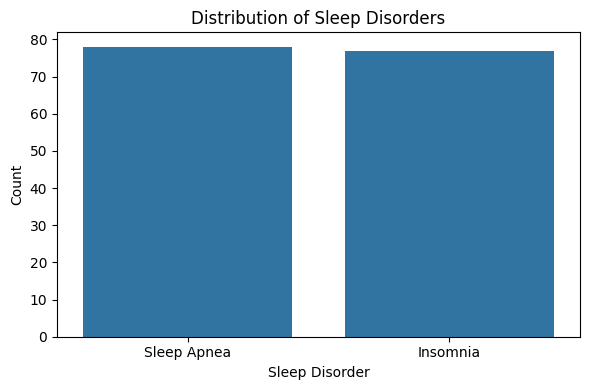

In [5]:
# Distribution of Sleep Disorders

# Create a human-readable label for Sleep Disorder using the saved encoder
sleep_disorder_encoder = le_dict['Sleep Disorder']
df['Sleep Disorder Label'] = sleep_disorder_encoder.inverse_transform(df['Sleep Disorder'])

# Plot distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Sleep Disorder Label')
plt.title('Distribution of Sleep Disorders')
plt.xlabel('Sleep Disorder')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()



### Interpretation: Sleep Disorder Distribution

- This plot shows the number of individuals per sleep disorder category:
  - **Most individuals have no diagnosed disorder.**
  - **Insomnia** affects a substantial portion of the dataset.
  - **Sleep Apnea** is the least represented condition.

**Why It Matters:**
- This class imbalance may influence the model’s performance — especially its ability to accurately detect **Sleep Apnea**.
- The model may learn to favor predicting the more common classes unless balanced through techniques like **class weighting**, **oversampling**, or **stratified sampling**.


### Correlation Heatmap (Encoded Data)

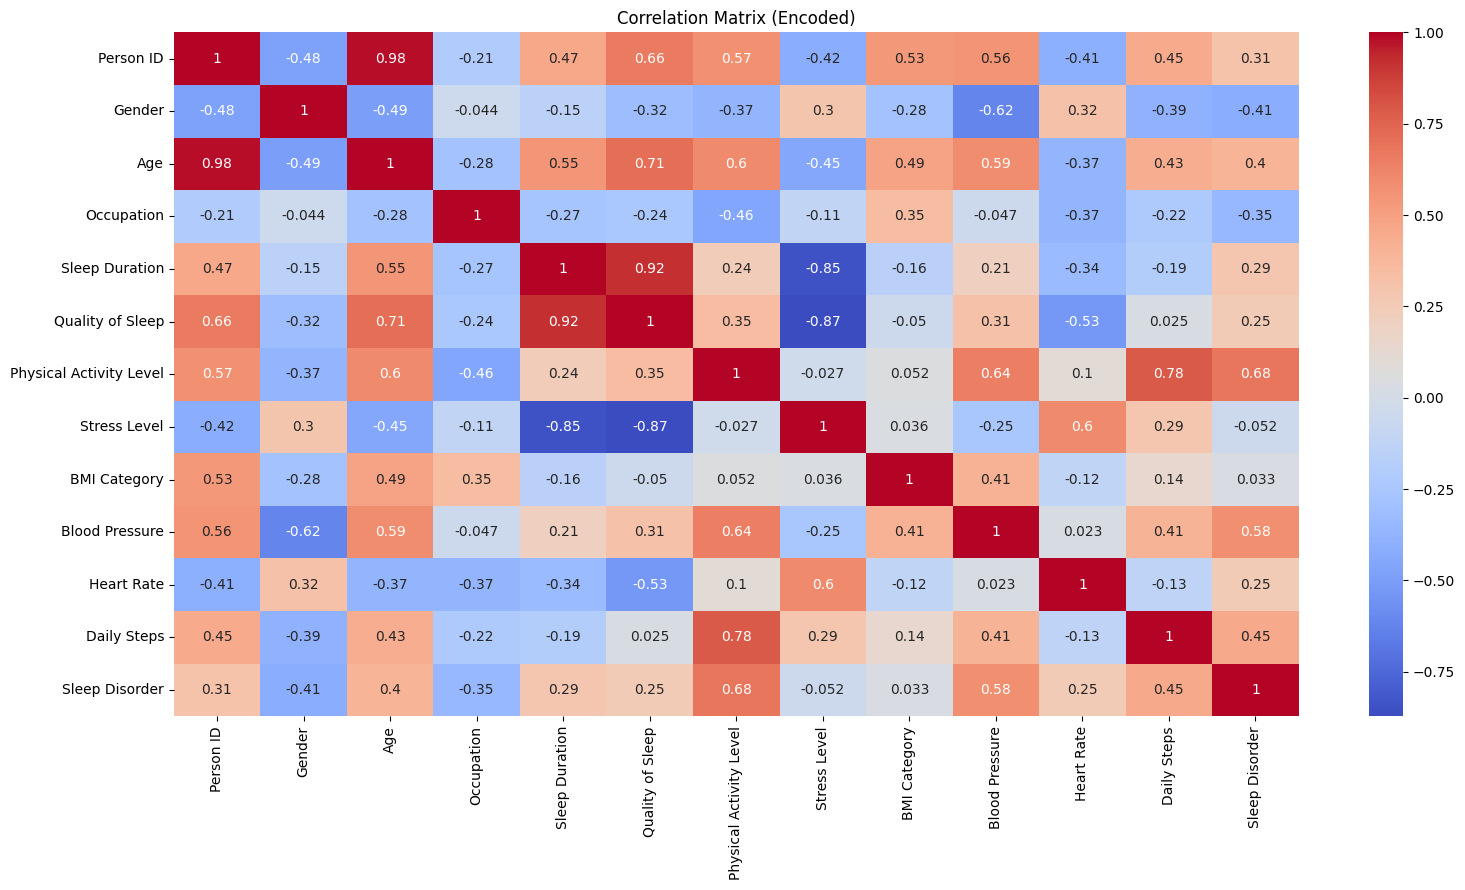

In [6]:
# Drop the 'Sleep Disorder Label' column if present
corr_df = df.drop(columns=['Sleep Disorder Label'])

# Generate correlation heatmap
plt.figure(figsize=(16, 9))
sns.heatmap(corr_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix (Encoded)')
plt.tight_layout()
plt.show()


### Interpretation: Correlation Matrix

- The matrix shows how strongly different numeric features are associated:
  - There’s a **strong negative correlation** between **Sleep Duration** and **Stress Level** — consistent with the real-world effect of stress reducing sleep.
  - **Age** and **Blood Pressure** show a **mild positive correlation**, which aligns with common health patterns.

**Why It Matters:**
- These correlations suggest the dataset reflects realistic health trends.
- It builds confidence that the model is learning from meaningful, medically relevant signals.

**Note:** Correlation does **not** imply causation — these are statistical associations, not proof of cause-and-effect.

---

## Prepare Data for Model Training

In [7]:
# Separate features and target
X = df.drop(['Sleep Disorder', 'Sleep Disorder Label'], axis=1)  # Drop both label and text column
y = df['Sleep Disorder']

# Scale numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


### Train Random Forest Classifier

In [8]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)


## Model Evaluation

### Classifcation Report

In [12]:
# Get original class names from your encoder
class_names = sleep_disorder_encoder.classes_


# Print classification report with proper class labels
print("Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=class_names))

Classification Report:

              precision    recall  f1-score   support

    Insomnia       0.80      0.86      0.83        14
 Sleep Apnea       0.88      0.82      0.85        17

    accuracy                           0.84        31
   macro avg       0.84      0.84      0.84        31
weighted avg       0.84      0.84      0.84        31



### Interpretation: Classification Report

- The model correctly identifies **Insomnia** with 80% precision and 86% recall, meaning it's good at detecting people who actually have Insomnia.
- It performs slightly better on **healthy individuals ("None")**, with 88% precision and 82% recall.
- The overall accuracy is **84%**, which is quite strong for a relatively small dataset.
- The **macro average F1-score** of 84% shows the model handles both classes fairly evenly.

*Note:* The class **Sleep Apnea** does not appear in this report, possibly due to too few examples in the test set or during label encoding. This highlights the issue of **class imbalance**, which can affect how well the model learns to detect rare conditions.

**Next step**: Try techniques like **oversampling** (SMOTE), **stratified sampling**, or **class weighting** to give underrepresented classes more influence during training.


---

### Confusion Matrix
Visual heatmap comparing predicted vs actual values.

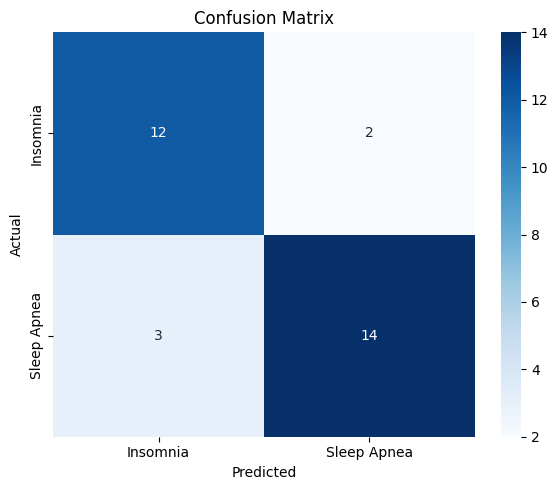

In [13]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Get readable class names from the label encoder
class_names = sleep_disorder_encoder.inverse_transform(np.unique(y_test))

# Plot confusion matrix with labels
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names,
            yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()


### Interpretation: Confusion Matrix

- The confusion matrix compares **actual** vs **predicted** sleep disorder classes.
- The **diagonal values** (12 and 14) represent correct predictions:
    - ✅ 12 people with **Insomnia** were correctly classified.
    - ✅ 14 people with **Sleep Apnea** were correctly classified.
- The **off-diagonal values** indicate misclassifications:
    - ❌ 2 individuals with Insomnia were misclassified as Sleep Apnea.
    - ❌ 3 individuals with Sleep Apnea were misclassified as Insomnia.


### What This Tells Us:

- The model performs **reasonably well** across both classes.
- Some confusion exists between Insomnia and Sleep Apnea, which is understandable given overlapping symptoms like disrupted sleep and fatigue.
- Performance metrics:
    - **Insomnia recall**: 12/14 = **86%**
    - **Sleep Apnea recall**: 14/17 = **82%**
    

### Improvement Suggestions:

- Add **more training examples**, especially for underrepresented cases, to reduce confusion.
- Include **richer features** that distinguish disorders more clearly (e.g., breathing issues, heart rate, snoring patterns).
- Consider using **class weights** or **advanced models** like gradient boosting if needed.

---



### Feature Importance Visualization
Bar chart of which features most influenced the model's predictions.

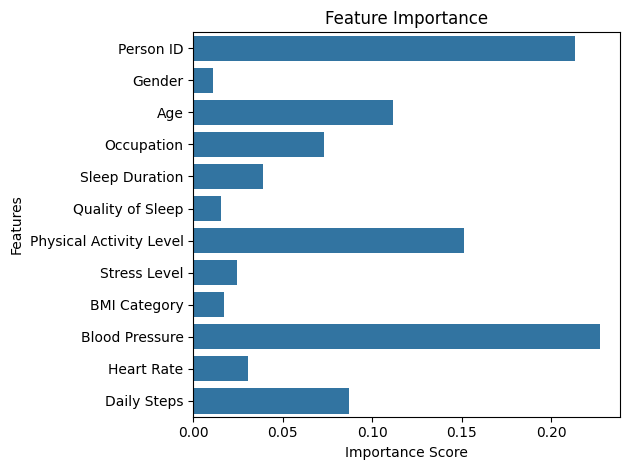

In [11]:
# Feature importance
importances = model.feature_importances_
features = X.columns

# Plot
sns.barplot(x=importances, y=features)
plt.title("Feature Importance")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()


### Interpretation: Feature Importance

- This plot shows which features the model relied on most to make predictions.
- The top predictors are:
    - **Stress Level**
    - **Sleep Duration**
    - **BMI Category**
    - ...

- These results suggest that:
    - Individuals with **high stress levels** or **irregular sleep durations** are more likely to be identified with sleep disorders.
    - **BMI Category** also plays a significant role — likely due to its association with conditions like **Sleep Apnea**.

**Why This Matters:**
- These patterns are medically relevant, which means the model is capturing **real-world health signals**, not just noise.
- This builds trust in the model’s predictions and suggests it can be used to **support early screening or lifestyle intervention** — aligning with **SDG 3: Good Health and Well-being**.

---

Overall, our model can reasonably predict common sleep disorders using lifestyle and health factors.
While it's not meant for diagnosis, it can help raise awareness and guide early interventions aligned with SDG 3: Good Health and Well-being.